# Aprendizaje No Supervisado

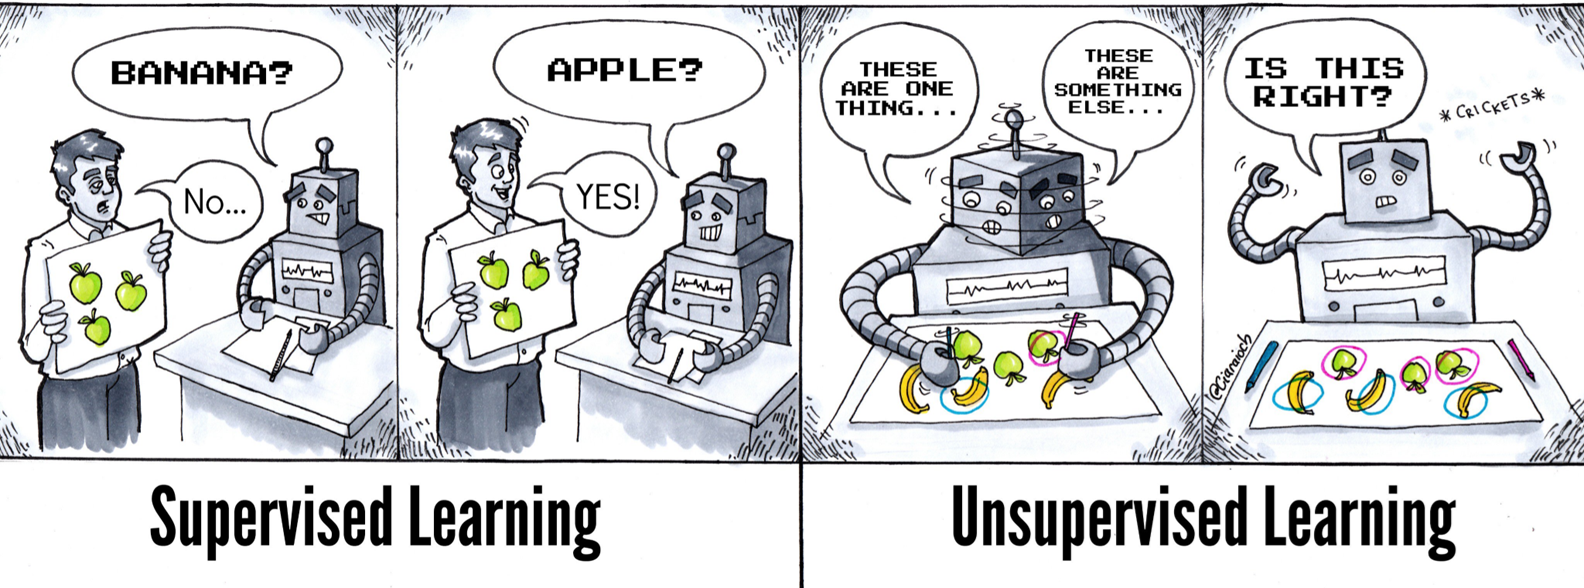

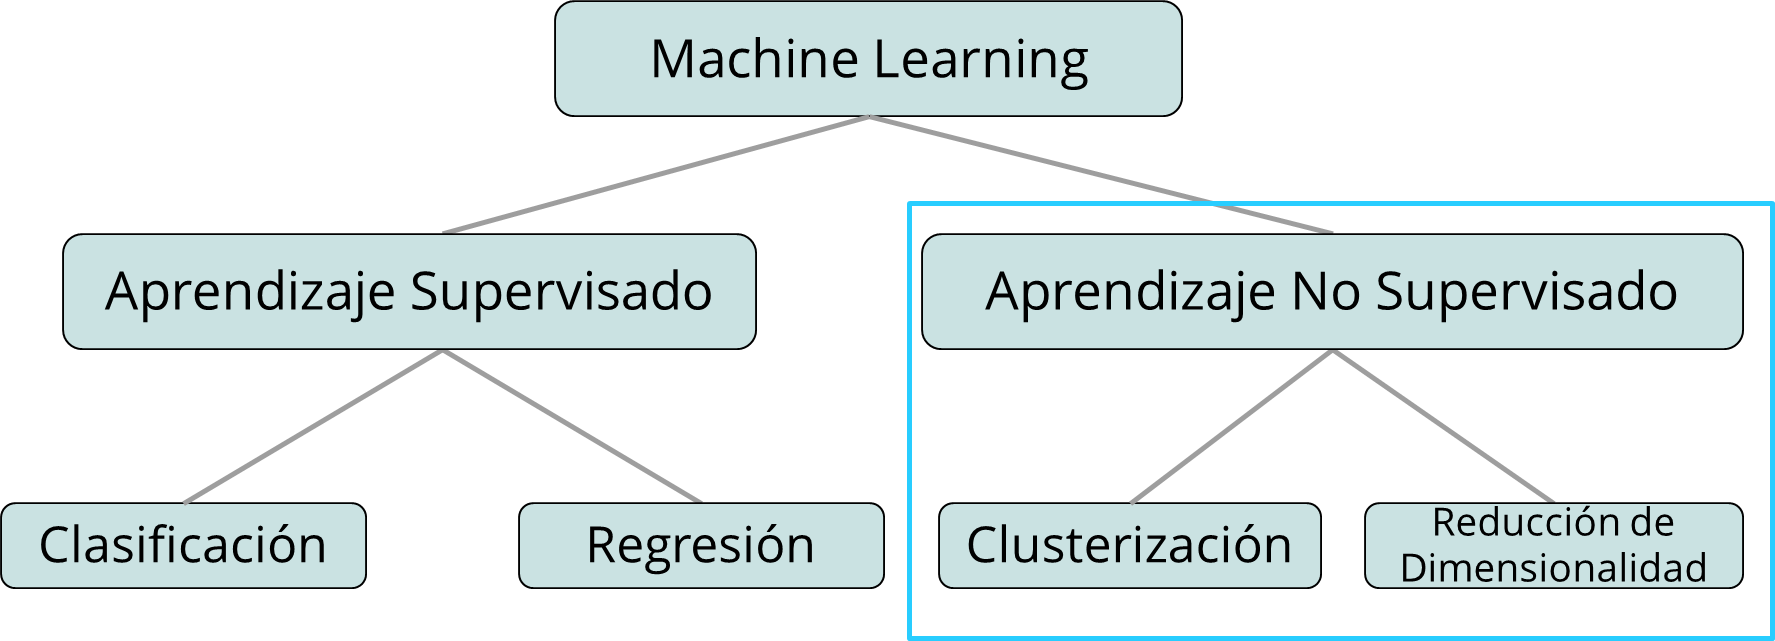

- No hay variable de destino, por lo que no hay definición de X e y

- Nosotros NO hacemos division de datos de prueba y entrenamiento

- NECESITAMOS escalar nuestros datos antes de ajustar nuestro modelo.

# Teoría K - Means

El algoritmo de K-Means es un método de agrupamiento (clustering) en aprendizaje automático que se utiliza para dividir un conjunto de datos en grupos o clústeres basados en similitudes entre las observaciones. Aquí tienes una explicación detallada de cómo funciona el algoritmo de K-Means y algunas imágenes recomendadas para explicarlo:

**Explicación del Algoritmo de K-Means:**

1. **Inicialización:** El algoritmo comienza seleccionando aleatoriamente K centroides iniciales, donde K es el número de clústeres que se desean formar. Estos centroides son puntos que representarán el centro de cada clúster.

2. **Asignación de Puntos a los Clústeres:** Cada punto de datos se asigna al clúster cuyo centroide está más cerca en términos de distancia euclidiana u otra métrica de distancia. Cada punto pertenece a un único clúster.

3. **Recálculo de Centroides:** Luego, se recalculan los centroides de cada clúster tomando el promedio de todos los puntos asignados a ese clúster. Los nuevos centroides representan el "nuevo centro" de cada clúster.

4. **Reasignación de Puntos:** Se repite el proceso de asignación de puntos a los clústeres basado en los nuevos centroides.

5. **Convergencia:** Los pasos 3 y 4 se repiten iterativamente hasta que no haya cambios significativos en la asignación de puntos a los clústeres o hasta que se alcance un número máximo de iteraciones.

6. **Resultados Finales:** Una vez que se alcanza la convergencia, se obtienen los clústeres finales. Cada clúster contiene un conjunto de puntos de datos similares entre sí y diferentes de los de otros clústeres.

**Imágenes Ilustrativas:**

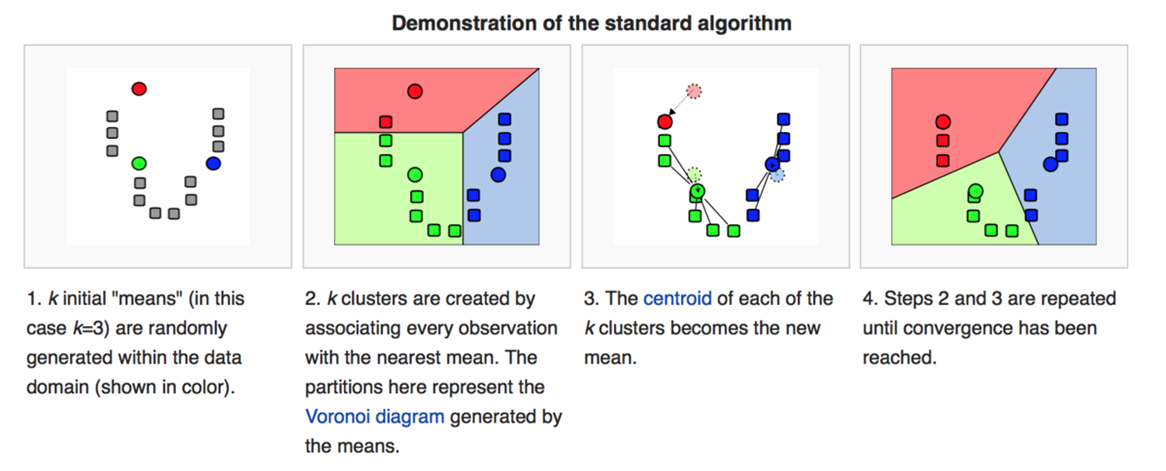


In [1]:
from IPython.display import Image

<img src="C:/Users/gilbe/OneDrive/Desktop/Gilberto/0. TEP/000. Analitica Avanzada de Datos ML/0. Grupo 6/Imagenes/KMeans.gif" alt="GIF" width="200" loop="infinite">

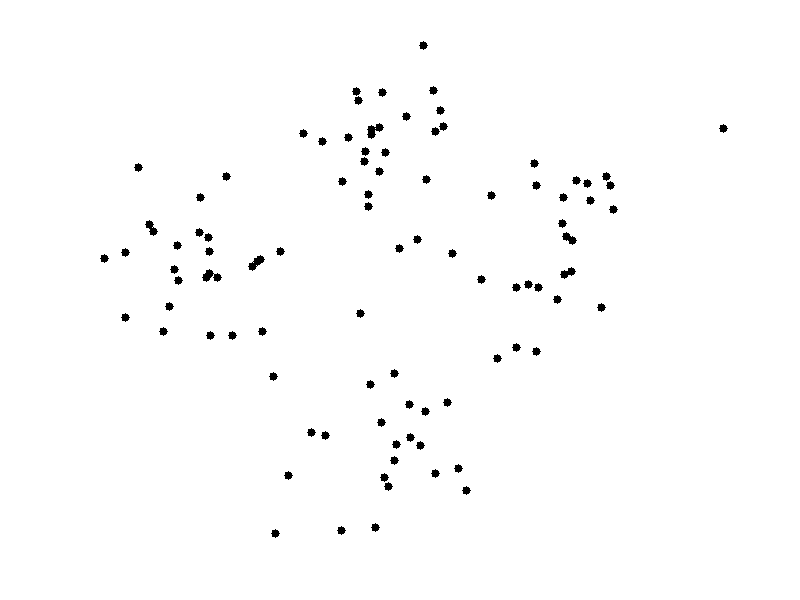

In [2]:
Image(filename=r"C:\Users\gilbe\OneDrive\Desktop\Gilberto\0. TEP\000. Analitica Avanzada de Datos ML\0. Grupo 6\Imagenes\KMeans.gif")

## K Means

K Means Clustering es un algoritmo de aprendizaje no supervisado que intenta agrupar datos en función de su similitud. El aprendizaje no supervisado significa que no hay ningún resultado que predecir y el algoritmo solo intenta encontrar patrones en los datos. En k means Clustering, tenemos que especificar el número de grupos en los que queremos que se agrupen los datos. El algoritmo asigna aleatoriamente cada observación a un grupo y encuentra el centroide de cada grupo. Luego, el algoritmo itera a través de dos pasos:

- Reasigna puntos de datos al clúster cuyo centroide sea el más cercano. 
- Calcula el nuevo centroide de cada grupo. 

Estos dos pasos se repiten hasta que la variación dentro del grupo no se puede reducir más. La variación dentro del grupo se calcula como la suma de la distancia euclidiana entre los puntos de datos y sus respectivos centroides del grupo.

## Set de datos

Para nuestros ejercicios de aprendizaje no supervisado, estaremos utilizando un set de datos de diferentes vinos con 3 variables a evaluar:

- Alcohol
- Acidez
- Magnesio

El objetivo es agrupar los diferentes vinos en base a estas 3 variables.

## Importar librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Obtención de datos

In [4]:
df = pd.read_csv('wine.csv')
df.head()

Alcohol  Malic_acid  Magnesium
0    14.23        1.71        127
1    13.20        1.78        100
2    13.16        2.36        101
3    14.37        1.95        113
4    13.24        2.59        118

## Visualización de datos

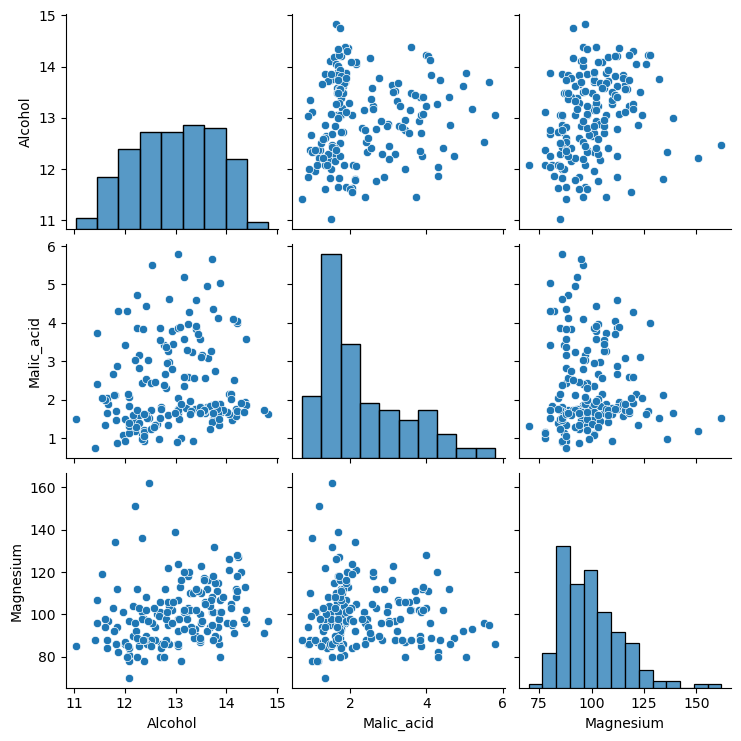

In [5]:
sb.pairplot(df)

# Creando los clusters (grupos)

In [6]:
# importando librería  k means
from sklearn.cluster import KMeans

In [7]:
# asignando la cantidad de clusters
kmeans = KMeans(n_clusters=3)

In [8]:
#normalizando variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [9]:
#ajustando el algoritmo al set de datos
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [10]:
# centroides de los grupos
kmeans.cluster_centers_

array([[ 0.06974968,  1.39652599, -0.22321334],
       [ 0.80957045, -0.42939565,  0.76132623],
       [-0.8610779 , -0.60188508, -0.59649176]])

In [11]:
# grupos asignados para cada muestra
pd.DataFrame(kmeans.labels_)

0
0    1
1    1
2    1
3    1
4    1
..  ..
173  0
174  0
175  0
176  1
177  0

[178 rows x 1 columns]

In [12]:
#tambien podemos aplicar el atributo .predict al dataset df para predecir el grupo o cluster
df['Cluster'] = kmeans.predict(df_scaled)

**Juntamos el set de datos originales con los labels para cada muestra** 

In [13]:
df_kmeans_cluster_3 = pd.concat([df.drop('Cluster',axis=1),pd.DataFrame(kmeans.labels_)],axis=1)
df_kmeans_cluster_3.columns = ['Alcohol','Malic_Acid','Magnesium','Cluster']
df_kmeans_cluster_3

Alcohol  Malic_Acid  Magnesium  Cluster
0      14.23        1.71        127        1
1      13.20        1.78        100        1
2      13.16        2.36        101        1
3      14.37        1.95        113        1
4      13.24        2.59        118        1
..       ...         ...        ...      ...
173    13.71        5.65         95        0
174    13.40        3.91        102        0
175    13.27        4.28        120        0
176    13.17        2.59        120        1
177    14.13        4.10         96        0

[178 rows x 4 columns]

In [14]:
df_kmeans_cluster_3['Cluster'].value_counts()

1    65
2    65
0    48
Name: Cluster, dtype: int64

## Visualización de resultados

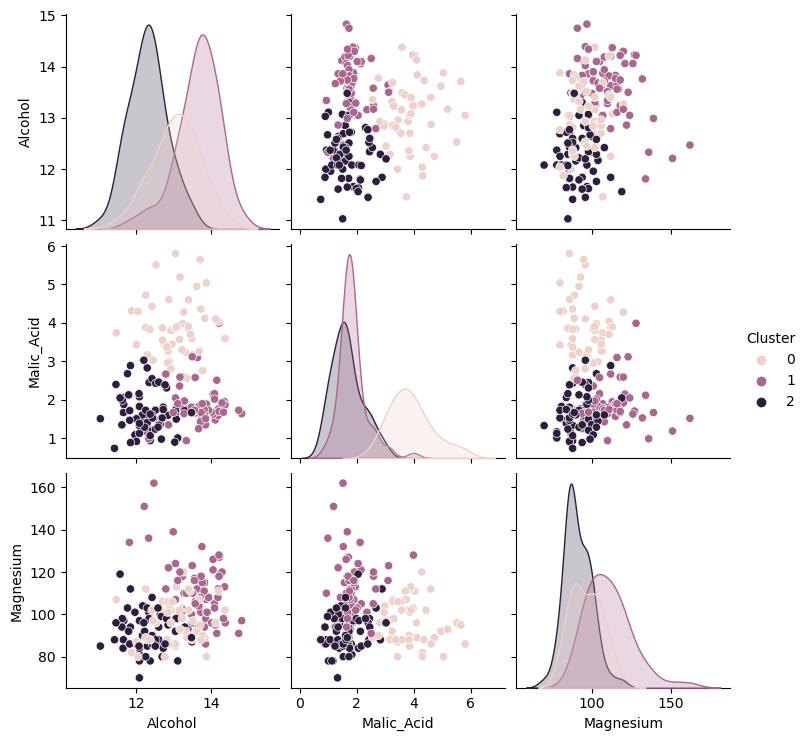

In [15]:
sb.pairplot(df_kmeans_cluster_3, hue= 'Cluster')

## Seleccionando los K grupos más optimos

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


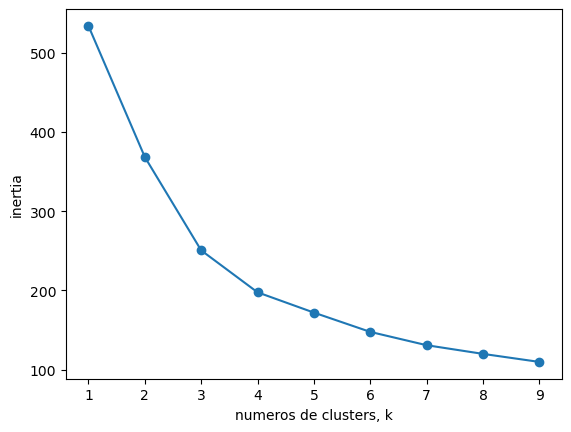

In [16]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Creando instancias de KMeans con k clusters: modelos
    model = KMeans(n_clusters=k)
    
    # ajustar el modelo a la data
    model.fit(df_scaled)
    
    # anexar el indicador de inertia a la lista inertias
    inertias.append(model.inertia_)
    
# Plotear ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('numeros de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Validando con el coeficiente de silueta

El coeficiente de silueta (Silhouette Score) es una métrica de evaluación utilizada en el análisis de clustering (agrupamiento) para determinar la calidad de los clústeres resultantes. Proporciona una medida de cuán similar es un objeto a su propio clúster en comparación con otros clústeres. El coeficiente de silueta evalúa la cohesión y la separación de los clústeres en función de la distancia intra-clúster y la distancia inter-clúster.

Aquí hay una explicación más detallada de cómo funciona el coeficiente de silueta:

- **Cohesión Intra-Clúster (a):** Para cada punto de datos en un clúster, se calcula la distancia promedio a todos los demás puntos dentro del mismo clúster. Esta distancia se llama "a" y mide la cohesión dentro del clúster.

- **Separación Inter-Clúster (b):** Para el mismo punto de datos, se calcula la distancia promedio a todos los puntos en el clúster más cercano que no contiene el punto en cuestión. Esta distancia se llama "b" y mide la separación del punto respecto a otros clústeres.

- **Coeficiente de Silueta (S):** El coeficiente de silueta para un punto de datos se calcula como (b - a) / max(a, b). Representa la diferencia entre la separación y la cohesión, normalizada por el valor máximo entre ambas. El valor del coeficiente de silueta varía entre -1 y 1.

   - Un valor de S cercano a 1 indica que el punto está bien clasificado en su propio clúster y alejado de otros clústeres, lo que sugiere una buena separación.
   - Un valor de S cercano a 0 indica que el punto está cerca de la frontera entre dos clústeres o que podría estar en un clúster superpuesto, lo que sugiere una clasificación ambigua.
   - Un valor de S cercano a -1 indica que el punto podría estar mal clasificado en un clúster y que debería estar en otro, lo que sugiere una mala separación.

- **Promedio del Coeficiente de Silueta:** Para evaluar la calidad global de un conjunto de clústeres, se calcula el promedio de los coeficientes de silueta de todos los puntos de datos en el conjunto. Un valor alto del promedio del coeficiente de silueta indica que los clústeres son bien definidos y separados, mientras que un valor bajo sugiere una mala calidad del agrupamiento.

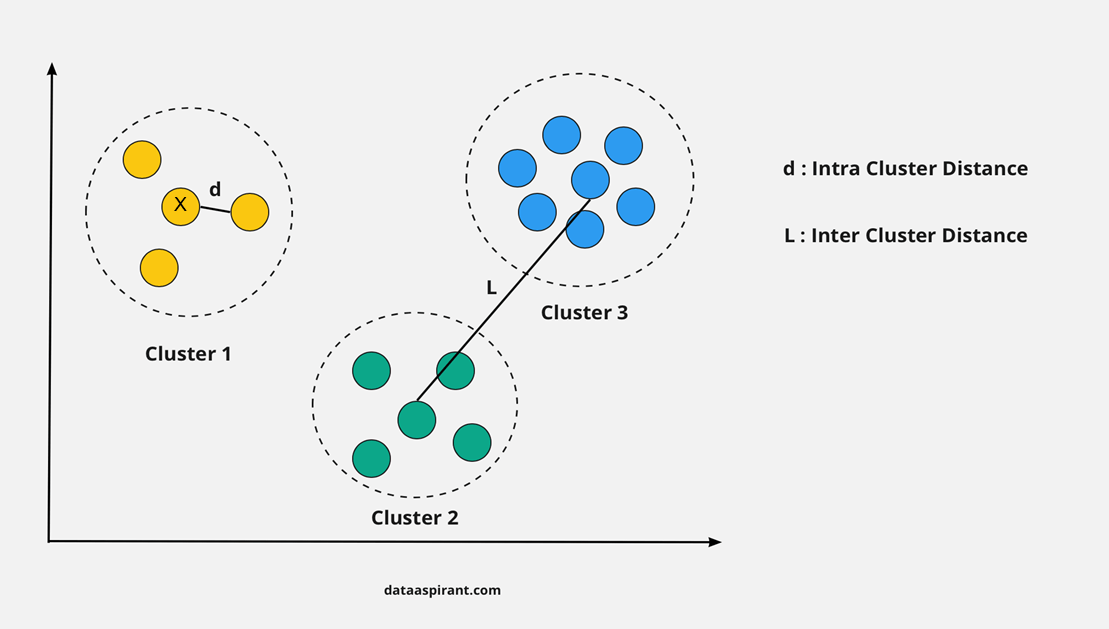

El coeficiente de silueta es una métrica útil para evaluar la calidad de los clústeres resultantes en tareas de agrupamiento. Cuanto más cercano esté el valor del coeficiente de silueta a 1, mejor será la calidad del agrupamiento. Sin embargo, debe utilizarse junto con otras métricas y técnicas de validación de clústeres para una evaluación completa y precisa.

En general, se considera que una agrupación es buena cuando el coeficiente de silueta tiene un valor mayor o igual a 0.15. Valores cercanos a 1 son aún mejores y sugieren una separación muy clara entre los clústeres. Sin embargo, un valor de 0.15 es un punto de referencia razonable para considerar una agrupación como aceptablemente buena.

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
X = df_scaled
y = kmeans.labels_
s = silhouette_score(X,y,metric = 'euclidean')
s

0.3625442483316349

# Identificando los centroides

In [19]:
centroides = pd.DataFrame(kmeans.cluster_centers_)
centroides = pd.DataFrame(scaler.inverse_transform(centroides))
centroides.columns = df.drop('Cluster',axis=1).columns
centroides

Alcohol  Malic_acid   Magnesium
0  13.057083    3.892083   96.562500
1  13.656000    1.858000  110.584615
2  12.303538    1.665846   91.246154

In [20]:
import plotly.express as px

In [21]:
fig = px.scatter_3d(centroides,
                    x='Alcohol',
                   y='Magnesium',
                   z='Malic_acid',
                   color = list(centroides.index))
fig.show()

In [22]:
fig = px.scatter_3d(df,
                    x='Alcohol',
                   y='Magnesium',
                   z='Malic_acid',
                   color = df['Cluster'])
fig.show()

# Identificando los vinos más cercanos a los centroides.

In [23]:
from sklearn.metrics import pairwise_distances_argmin_min

#vemos el representante del grupo, el vino más cercano a su centroide
closest, _ = pairwise_distances_argmin_min(centroides, df.drop('Cluster',axis=1))
closest #arroja un arreglo de los indices de los registros más cercanos a sus centroides.

array([142,  52, 108], dtype=int64)

In [24]:
df.drop('Cluster',axis=1).loc[closest[0]]

Alcohol       13.52
Malic_acid     3.17
Magnesium     97.00
Name: 142, dtype: float64

In [25]:
df.drop('Cluster',axis=1).loc[closest[1]]

Alcohol        13.82
Malic_acid      1.75
Magnesium     111.00
Name: 52, dtype: float64

In [26]:
df.drop('Cluster',axis=1).loc[closest[2]]

Alcohol       12.22
Malic_acid     1.29
Magnesium     92.00
Name: 108, dtype: float64

In [27]:
#pip install yellowbrick -- con pip en jupyter
#conda install -c districtdatalabs yellowbrick --  para anaconda prompt

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



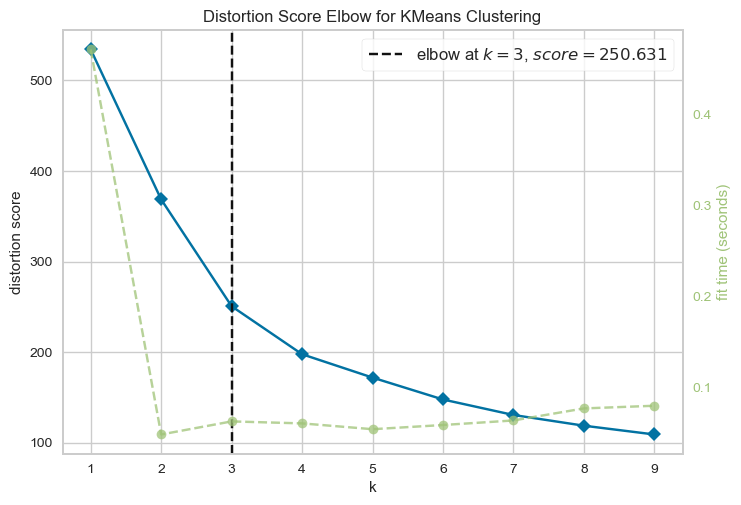

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from yellowbrick.cluster import KElbowVisualizer

# Crear una instancia del visualizador y modelo de agrupación en clústeres
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)) #evalua de 1 a 10 grupos

visualizer.fit(df_scaled)        # ajustar los datos al visualizador
visualizer.show()        # Mostrar figura

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



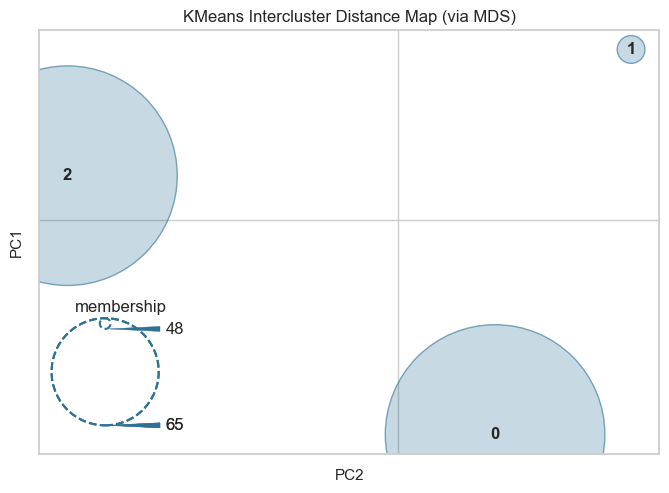

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [29]:
from yellowbrick.cluster import InterclusterDistance

# Crear una instancia del visualizador y modelo de agrupación en clústeres
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # ajustar los datos al visualizador
visualizer.show()        #mostrar figura

#El tamaño de los globos me dice que cluster están más cercanos sus integrantes